Outliers:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m      1 stop   
396      

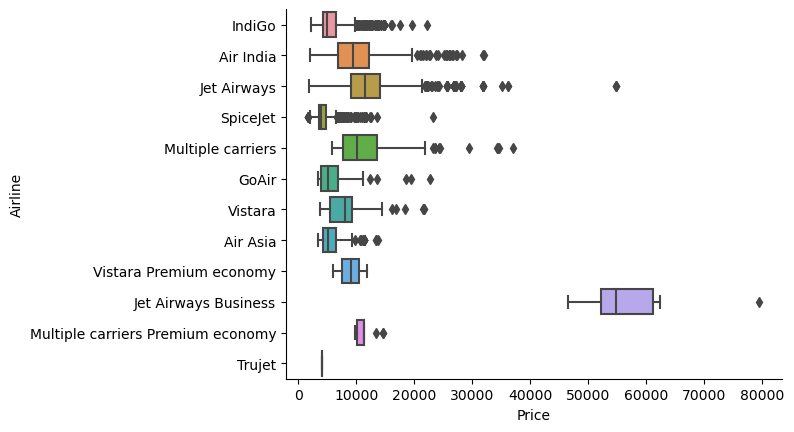

In [2]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('flight_price.xlsx')
df.head()
sns.boxplot(x="Price", y="Airline", data=df)
sns.despine()

# identify outliers
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
print("Outliers:")
print(outliers)

# analyze outliers
mean = df["Price"].mean()
std = df["Price"].std()

for idx, row in outliers.iterrows():
    if row["Price"] > mean + 2*std:
        print("High outlier detected:", row["Price"])
    elif row["Price"] < mean - 2*std:
        print("Low outlier detected:", row["Price"])
